# Red Wine Quality

https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

1. fixed acidity-
most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

2. volatile acidity-
the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

3. citric acid-
found in small quantities, citric acid can add 'freshness' and flavor to wines

4. residual sugar-
the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

5. chlorides-
the amount of salt in the wine

6. free sulfur dioxide-
the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

7. total sulfur dioxide-
amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

8. density-
the density of water is close to that of water depending on the percent alcohol and sugar content

9. pH-
describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

10. sulphates-
a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

11. alcohol-
the percent alcohol content of the wine

12. quality-
output variable (based on sensory data, score between 0 and 10)

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import confusion_matrix, roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score,r2_score,ConfusionMatrixDisplay

In [82]:
rw_data=pd.read_csv("winequality-red.csv")

In [83]:
rw_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [84]:
rw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [85]:
rw_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [86]:
features=rw_data.columns.tolist()
features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [87]:
rw_data_num=rw_data.select_dtypes('number')
rw_data_num

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#### There are 1599 rows and 12 numerical features

In [88]:
rw_data_cat=rw_data.select_dtypes('object')
rw_data_cat

""
0
1
2
3
4
...
1594
1595
1596
1597


#### There are 0 categorical features

### Numerical Features

In [89]:
rw_data_num.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### There are no missing values in numerical columns

In [90]:
rw_data.shape

(1599, 12)

In [91]:
rw_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Interpretation:**
- Total sulfur dioxide ,free sulfur dioxide, chlorides, residual sugar features have a lot of outliers that needs to be handled.

## 1. What is quantity of various qualities of wine ?

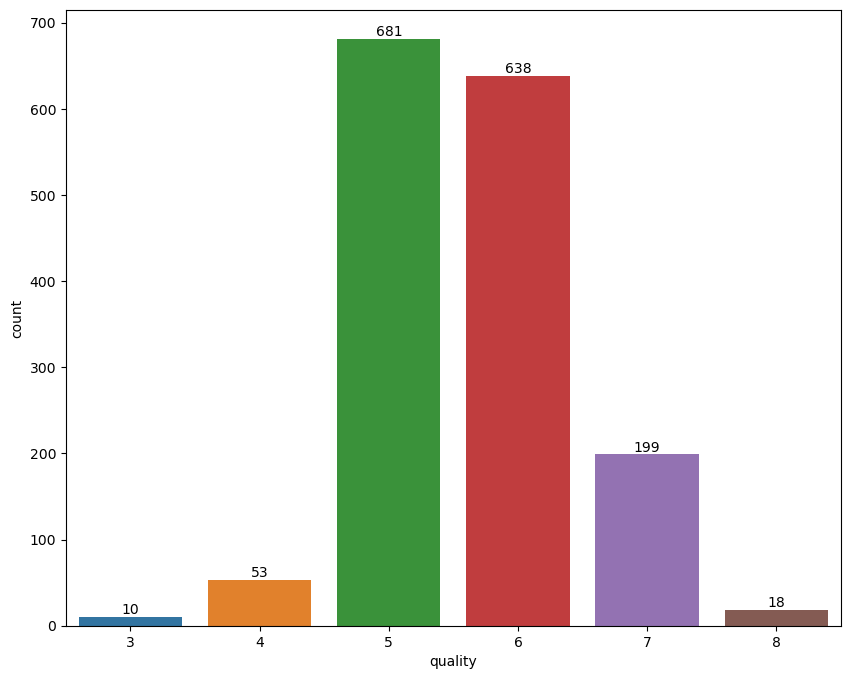

In [92]:
plt.figure(figsize=(10,8))
axiss=sns.countplot(data=rw_data, x='quality')
for i in axiss.containers:
    axiss.bar_label(i)
plt.show()

**Interpretation:**
    
- More number of wines in the dataset have quality between 5 and 6

## 2. How quality of wine dependent on  pH and critic acid content of wine ? (Good Quality means score above 6)

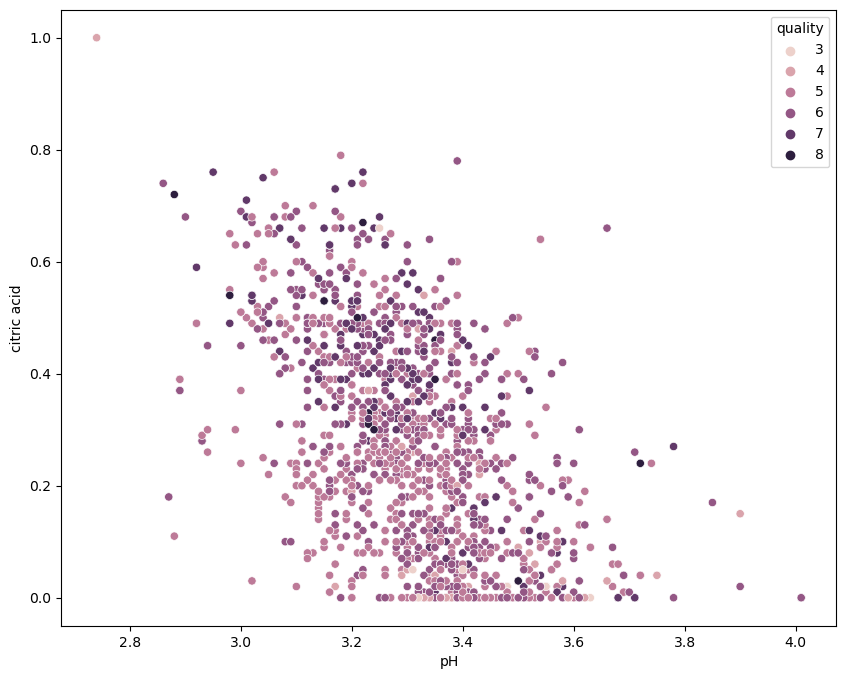

In [93]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=rw_data, x='pH', y='citric acid',hue='quality')
plt.show()

**Interpretation:**

- Most of the wines with higher quality have citric acid in the range of 0.3-0.6 and ph range from 3.1-3.4

## 3. What is the total sulfur dioxide content of Good Quality wines? (Good Quality means score above 6)

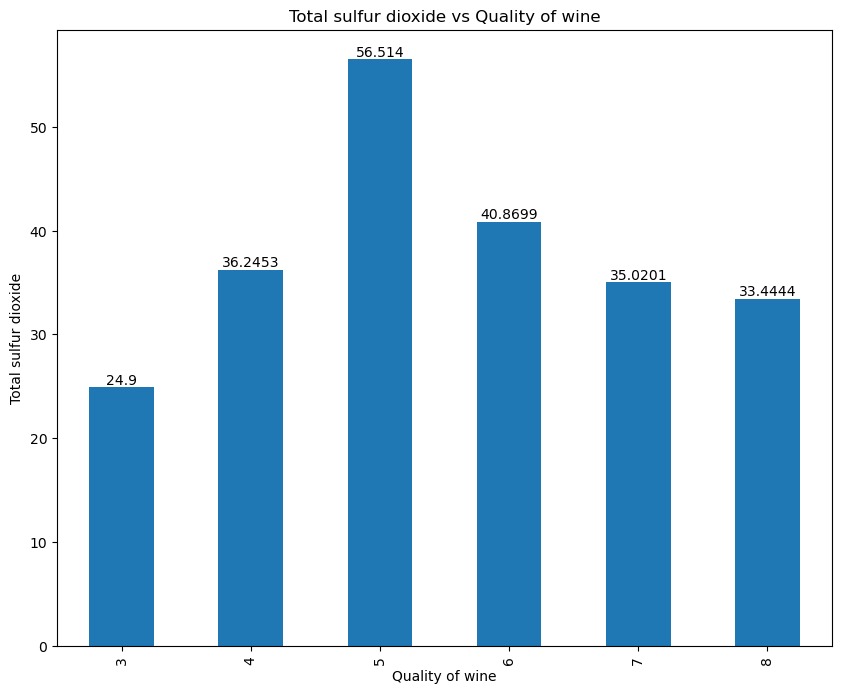

In [94]:
plt.figure(figsize=(10,8))
axiss=rw_data.groupby(['quality'])['total sulfur dioxide'].mean().plot(kind='bar')
plt.xlabel('Quality of wine')
plt.ylabel('Total sulfur dioxide')
plt.title('Total sulfur dioxide vs Quality of wine')
for i in axiss.containers:
    axiss.bar_label(i)
plt.show()

**Interpretation:**

- Quality of wine is not influenced by the total sulfur dioxide content. Maximum amount of sulphur dioxide is present in wine with quality 5.

## 4. What is the amount of citric acid and volatile acidity maintained by Good Quality wines? (Good Quality means score above 6)

<Axes: xlabel='volatile acidity', ylabel='citric acid'>

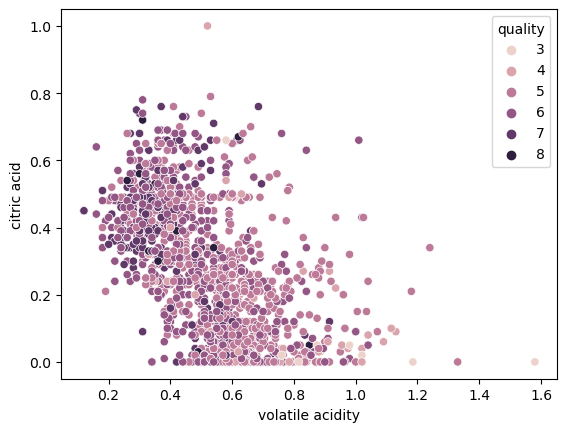

In [95]:
sns.scatterplot(rw_data, x='volatile acidity', y='citric acid', hue='quality')

**Integration:**

- More number of good quality wines have citric acid content between 0.3 to 0.8 and less volatile acidity 

## 5. How does the amount of alcohol varry with Quality in wines? (Good Quality means score above 6)

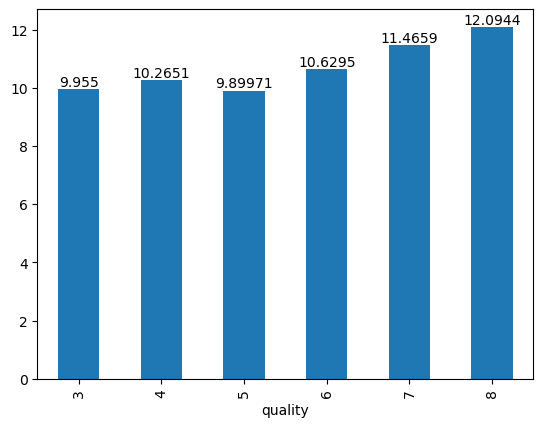

In [96]:
axiss=rw_data.groupby(['quality'])['alcohol'].mean().plot(kind='bar')
for i in axiss.containers:
    axiss.bar_label(i)
plt.show()

**Integration:**

- Good quality wines have higher amount of alcohol content

# Data Preprocessing

In [97]:
rw_data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

### Interpretation:
1. residual sugar and chlorides has high positive skewness
2. sulphates feature also has some positive skewness
2. High values of positive skewness depicts the columns have large number of outliers towards the right side of the distribution

In [98]:
positive_skewed_features=['residual sugar','chlorides','sulphates']
for i in positive_skewed_features:
    print(i,":",rw_data[i].skew())

residual sugar : 4.54065542590319
chlorides : 5.680346571971722
sulphates : 2.4286723536602945


#### Using logarithmic to remove the positive skewness and transforming the data into normal distributions on columns

In [99]:
temp_data=pd.DataFrame()
for i in positive_skewed_features:
    temp_data['log_'+i]=np.log(rw_data[i])

In [100]:
temp_data.skew()

log_residual sugar    1.806864
log_chlorides         1.745215
log_sulphates         0.921867
dtype: float64

- Log transform had a good effect on reducing positive skewness on the data distribution in log_residual sugar, log_chlorides and log_sulphates features 

**Hence taking log value to reduce skewness for residual sugar, chlorides and sulphates features**

In [101]:
for i in ['residual sugar', 'chlorides','sulphates']:
    rw_data[i]=np.log(rw_data[i])

In [102]:
rw_data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          1.806864
chlorides               1.745215
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               0.921867
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [103]:
rw_data_num = rw_data.select_dtypes(include='number')
rw_data_num.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.641854,-2.577022,11.0,34.0,0.9978,3.51,-0.579818,9.4,5
1,7.8,0.88,0.00,0.955511,-2.322788,25.0,67.0,0.9968,3.20,-0.385662,9.8,5
2,7.8,0.76,0.04,0.832909,-2.385967,15.0,54.0,0.9970,3.26,-0.430783,9.8,5
3,11.2,0.28,0.56,0.641854,-2.590267,17.0,60.0,0.9980,3.16,-0.544727,9.8,6
4,7.4,0.70,0.00,0.641854,-2.577022,11.0,34.0,0.9978,3.51,-0.579818,9.4,5


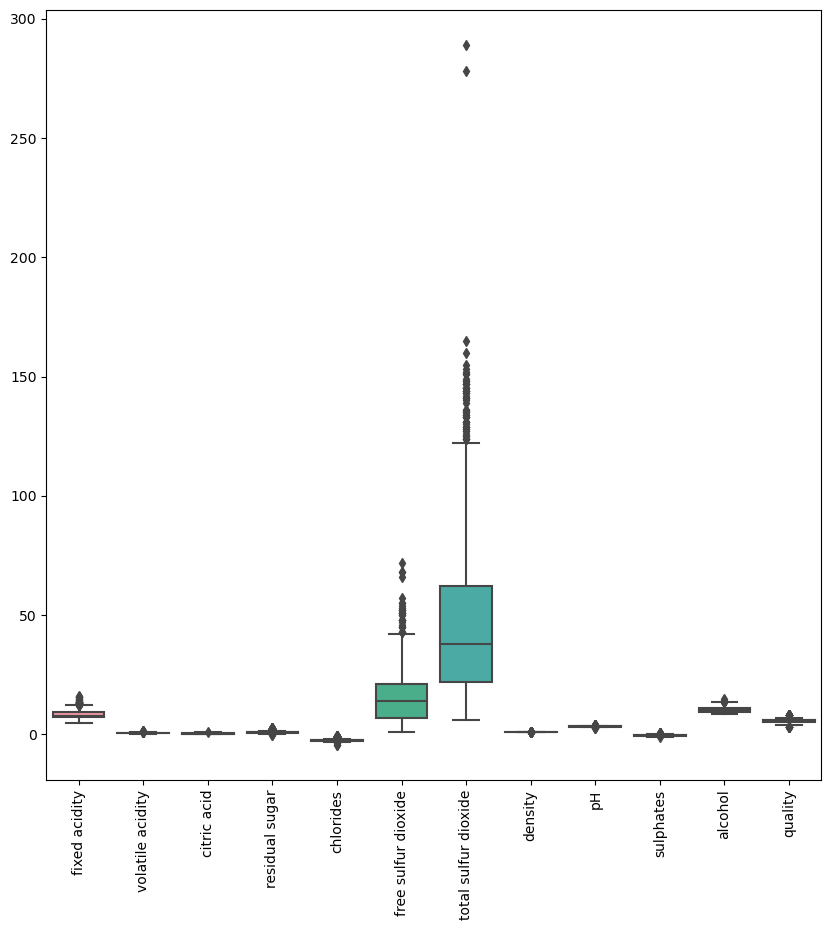

In [104]:
plt.figure(figsize=(10,10))
sns.boxplot(data=rw_data_num)
plt.xticks(rotation=90)
plt.show()

**Interpretation:**
- Total sulfur dioxide has outliers that are way to dispersed. Hence this needs to be treated for outliers.
- Rest all features have closely packed outliers.

## Outlier Filter

In [105]:
#getting threshold for outliers
Q1=rw_data_num.quantile(0.25)
Q3=rw_data_num.quantile(0.75)
IQR=Q3-Q1
lower_bound= Q1 - 1.5*IQR
upper_bound= Q3 + 1.5*IQR

In [106]:
rw_data.shape

(1599, 12)

In [107]:
rw_data=rw_data[~((rw_data_num<lower_bound)|(rw_data_num>upper_bound)).any(axis=1)]

In [108]:
rw_data.shape

(1212, 12)

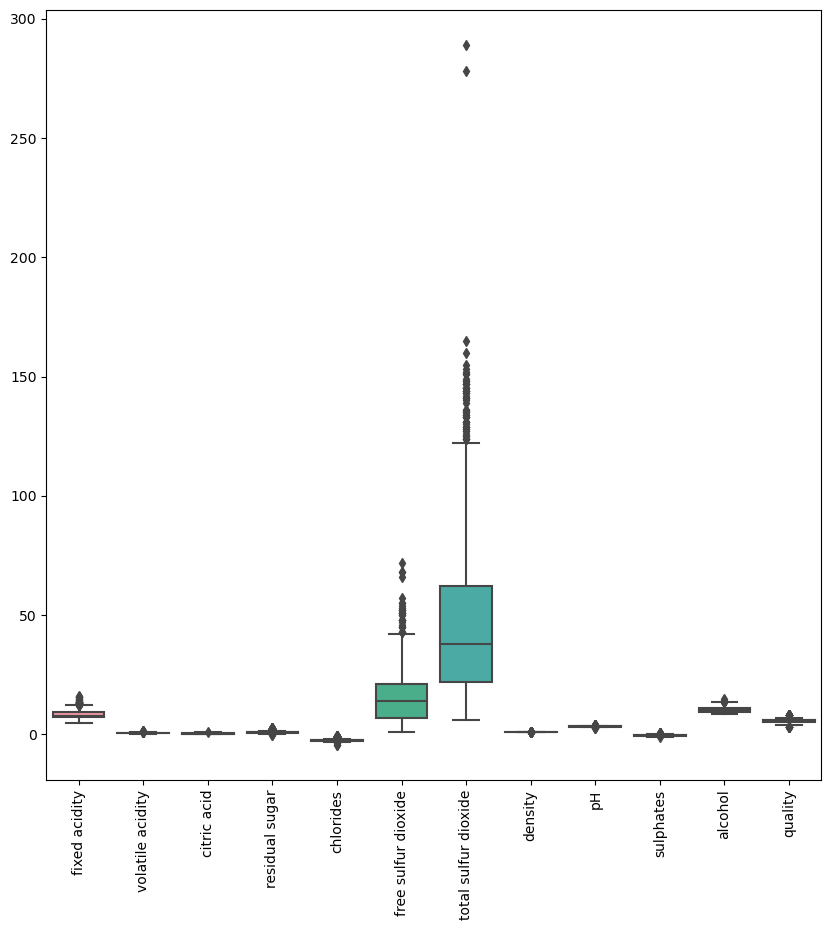

In [109]:
plt.figure(figsize=(10,10))
sns.boxplot(data=rw_data_num)
plt.xticks(rotation=90)
plt.show()

**Interpretation:**
- Even after outlier removal we see that total sulfur dioxide still contains lot of dispersed outliers. All other features also contains a lot of outliers. Hence these needs to be treated during scaling to decrease the impact of it during fitting the model.

In [110]:
# Plotting the distribution of numerical features
continous_features=[]
for i in rw_data.select_dtypes('number').columns.tolist():
    if(rw_data[i].value_counts().count()>=25):
        continous_features.append(i)
continous_features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

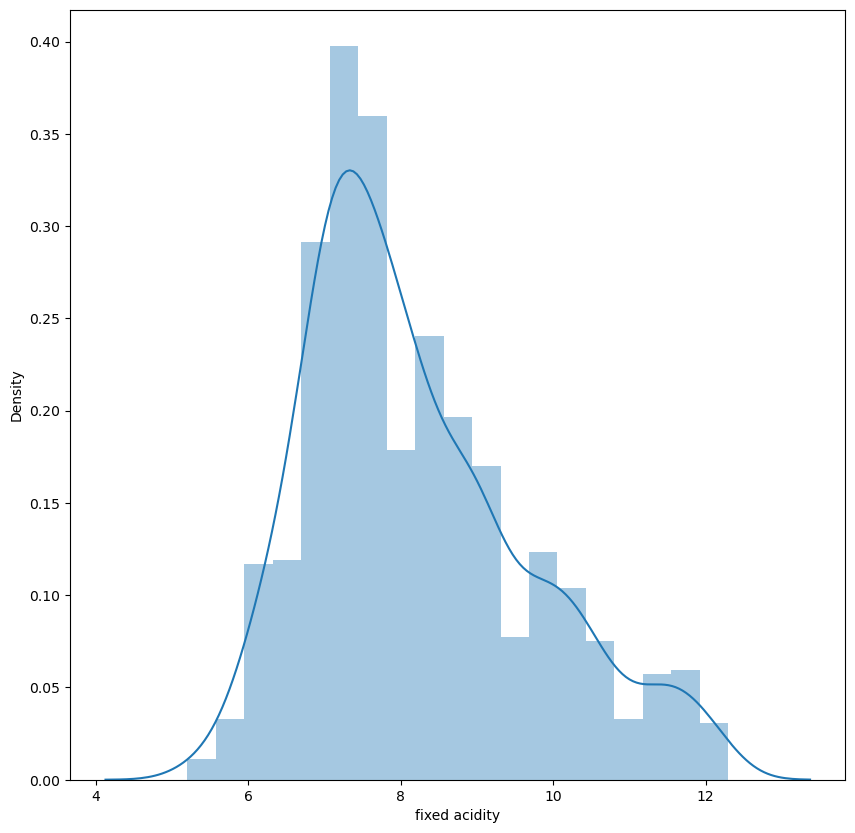

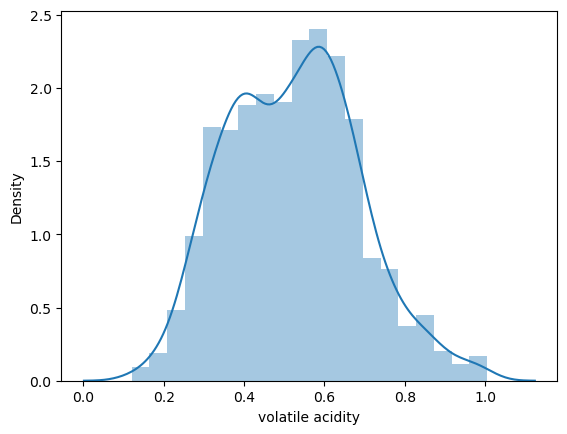

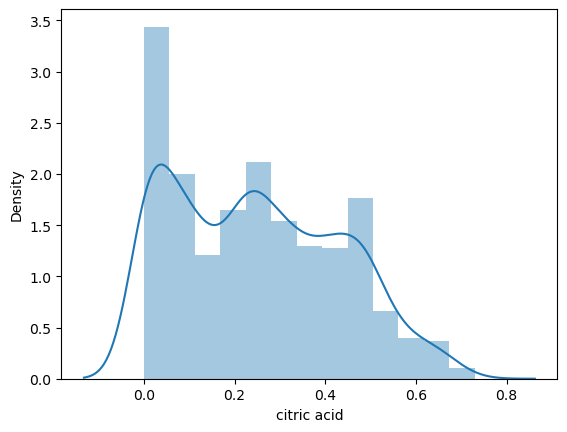

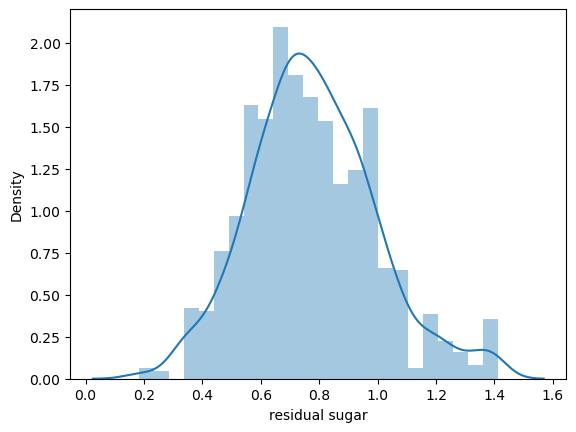

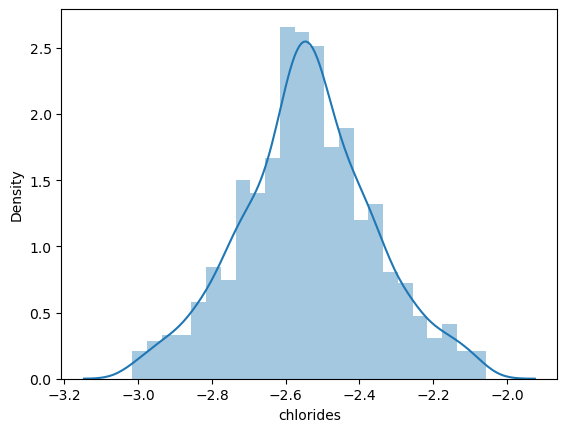

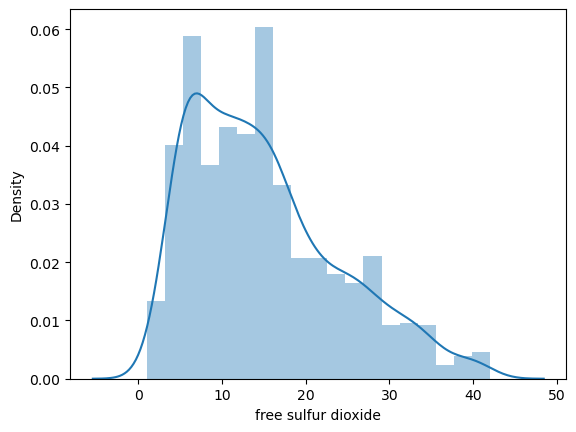

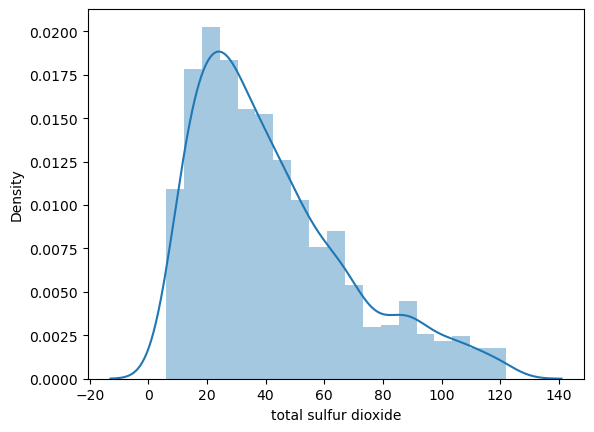

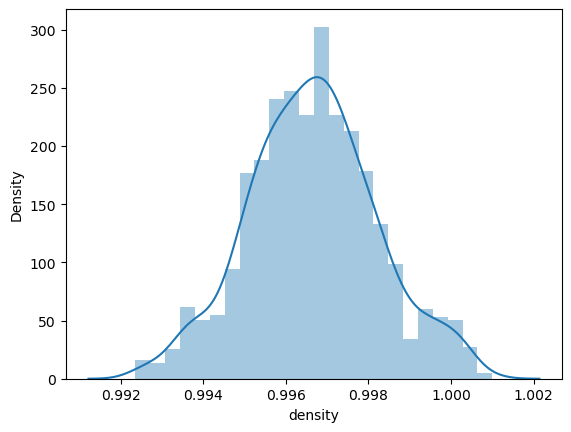

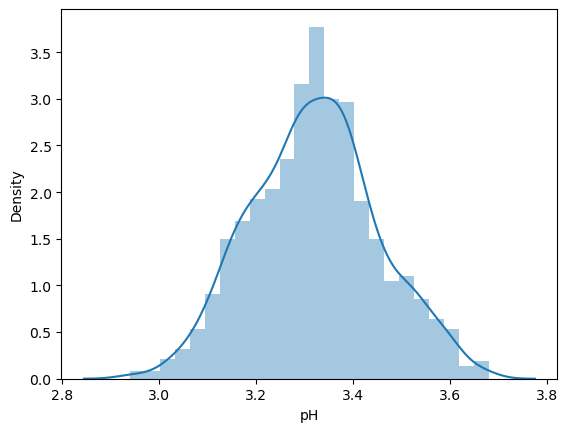

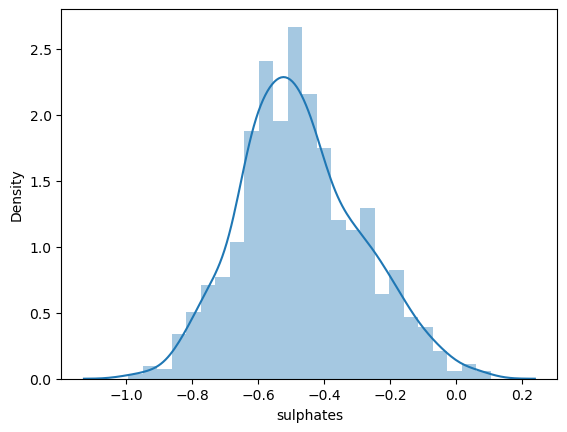

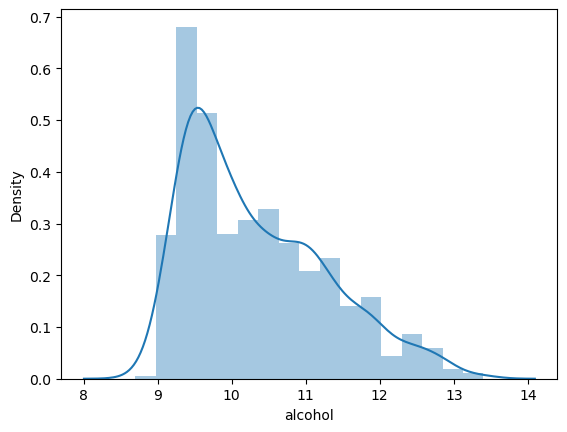

In [111]:
plt.figure(figsize=(10,10))
for i in continous_features:
    sns.distplot(rw_data[i])
    plt.show()

**Interpretation:**
1. Fixed acidity is positively skewed and we have more number of wines with fixed acidity in the range of 6-10 scale.
2. Volatile acidity for scale 0.4-0.7 is most common in the dataset.
3. most wines have citric acid content in the scale of 0-0.5 
4. residual sugar is normally distributed with the most preferred range of 0.6-0.8
5. Total sulphur dioxide in the red wines are in the range 20-60 and SO2 becomes evident in the nose and taste of wine, so less number of wines have so2 more than 50.
6. The density of 0.994-0.998 is preferrable.
7. Favourable PH is from 3.2-3.4
8. Most of the wines have less alcohol content with the most common being 9-10%.

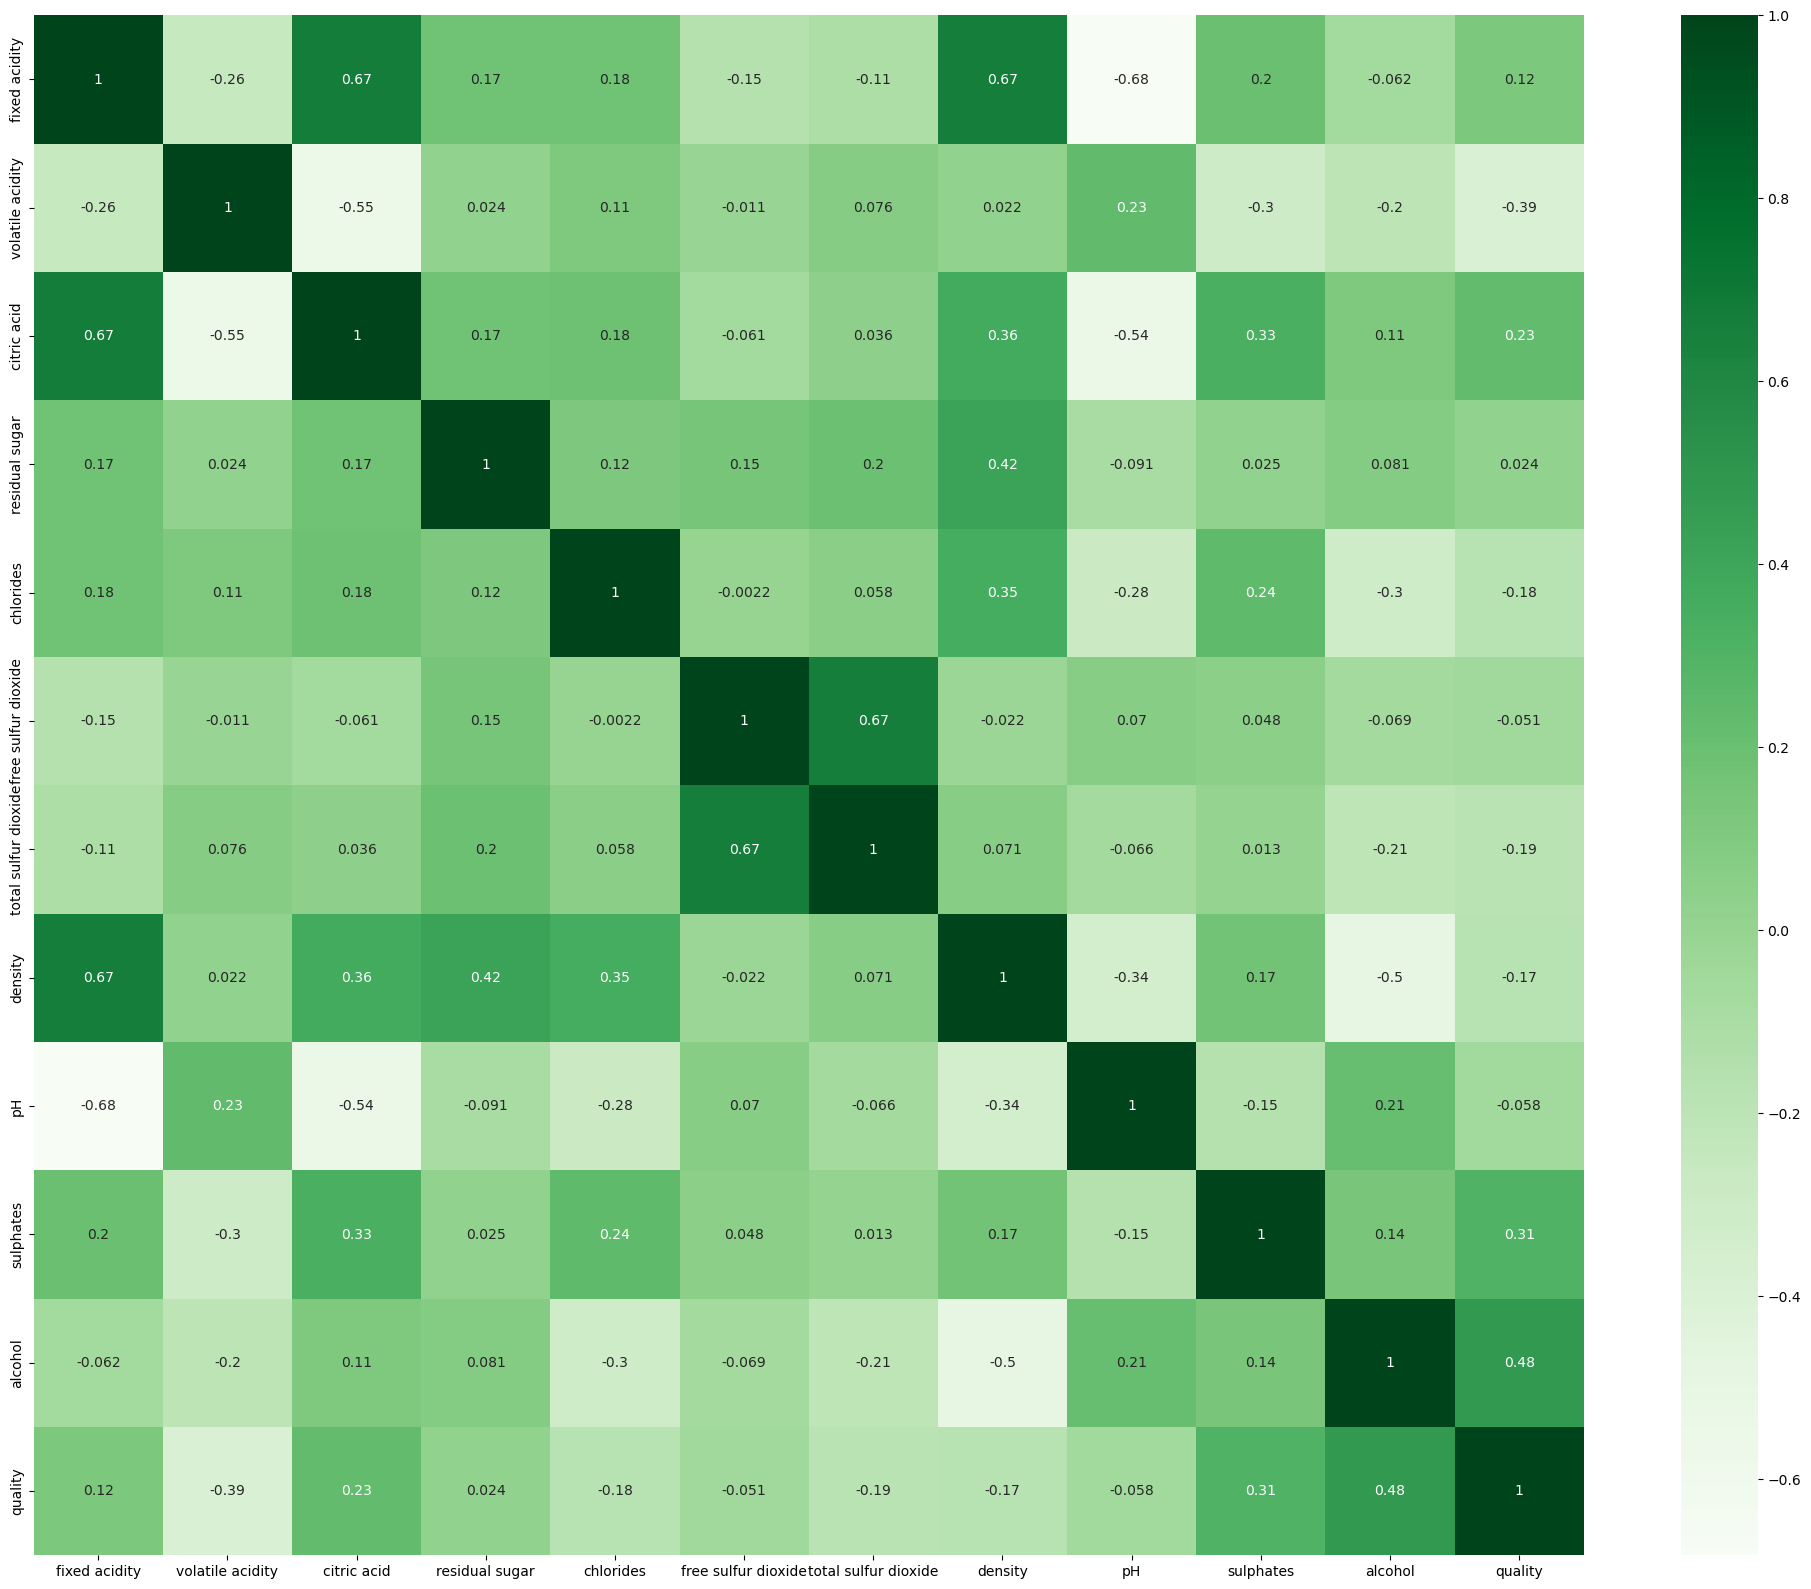

In [112]:
# correlation matrix:
plt.figure(figsize=(25,20))
sns.heatmap(rw_data_num.corr(),annot=True,cmap='Greens')
plt.show()

**Interpretation:**

1. 'density' and 'fixed acidity' show high positive correlation. Hence any of this columns can be dropped.

In [113]:
X = rw_data.drop('quality',axis=1)
y = rw_data['quality']

In [114]:
X_num=X.select_dtypes('number')
X_num

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,0.641854,-2.577022,11.0,34.0,0.99780,3.51,-0.579818,9.4
1,7.8,0.880,0.00,0.955511,-2.322788,25.0,67.0,0.99680,3.20,-0.385662,9.8
2,7.8,0.760,0.04,0.832909,-2.385967,15.0,54.0,0.99700,3.26,-0.430783,9.8
3,11.2,0.280,0.56,0.641854,-2.590267,17.0,60.0,0.99800,3.16,-0.544727,9.8
4,7.4,0.700,0.00,0.641854,-2.577022,11.0,34.0,0.99780,3.51,-0.579818,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.693147,-2.407946,32.0,44.0,0.99490,3.45,-0.544727,10.5
1595,5.9,0.550,0.10,0.788457,-2.780621,39.0,51.0,0.99512,3.52,-0.274437,11.2
1596,6.3,0.510,0.13,0.832909,-2.577022,29.0,40.0,0.99574,3.42,-0.287682,11.0
1597,5.9,0.645,0.12,0.693147,-2.590267,32.0,44.0,0.99547,3.57,-0.342490,10.2


## Rescaling numeric columns

In [115]:
scaler = StandardScaler()
X_num_scaled= scaler.fit_transform(X_num)

In [116]:
type(X_num_scaled)

numpy.ndarray

In [117]:
# Convert the scaled numpy array back to DataFrame
X_num_scaled = pd.DataFrame(X_num_scaled,index=X_num.index,columns=X_num.columns)

In [118]:
X=X_num_scaled

### Check for NA in X and y; Check for shape compatibility

In [39]:
print("Checking for NAs and Shape Compatibility")
print(X.isnull().sum())
print(y.isnull().sum())
print(X.shape)
print(y.shape)

Checking for NAs and Shape Compatibility
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64
0
(1212, 11)
(1212,)


In [40]:
y=y.map({3:0,4:0,5:0,6:1,7:1,8:1})

### Train-test split

In [41]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.3,random_state=42)

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(848, 11)
(364, 11)
(848,)
(364,)


## KNN Classifier

In [119]:
kmodel=KNeighborsClassifier(n_neighbors=3)

In [120]:
kmodel.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [121]:
X_train_temp=X_train

In [122]:
X_train_temp['prob']=kmodel.predict_proba(X_train)[:,1]

In [123]:
data_ROC= pd.DataFrame(columns=['Threshold','TP','TN','FP','FN','TPR','FPR'])

In [48]:
#train set
j=0
for t in np.arange(0,1.1,0.1):
    y_train_pred=(X_train_temp['prob']>t).astype(int)
    cm = confusion_matrix(y_train, y_train_pred)
    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    TPR = TP/(TP+FN)
    FPR = FP/(TN+FP)
    data_ROC.loc[j]=pd.Series({'Threshold': t, 'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN, 'TPR': TPR, 'FPR': FPR})
    j=j+1
    
auc = roc_auc_score(y_train,X_train_temp['prob'])
print(data_ROC)
print(auc)

    Threshold     TP     TN     FP     FN       TPR       FPR
0         0.0  453.0  186.0  209.0    0.0  1.000000  0.529114
1         0.1  453.0  186.0  209.0    0.0  1.000000  0.529114
2         0.2  453.0  186.0  209.0    0.0  1.000000  0.529114
3         0.3  453.0  186.0  209.0    0.0  1.000000  0.529114
4         0.4  407.0  320.0   75.0   46.0  0.898455  0.189873
5         0.5  407.0  320.0   75.0   46.0  0.898455  0.189873
6         0.6  407.0  320.0   75.0   46.0  0.898455  0.189873
7         0.7  270.0  395.0    0.0  183.0  0.596026  0.000000
8         0.8  270.0  395.0    0.0  183.0  0.596026  0.000000
9         0.9  270.0  395.0    0.0  183.0  0.596026  0.000000
10        1.0    0.0  395.0    0.0  453.0  0.000000  0.000000
0.9347835806298377


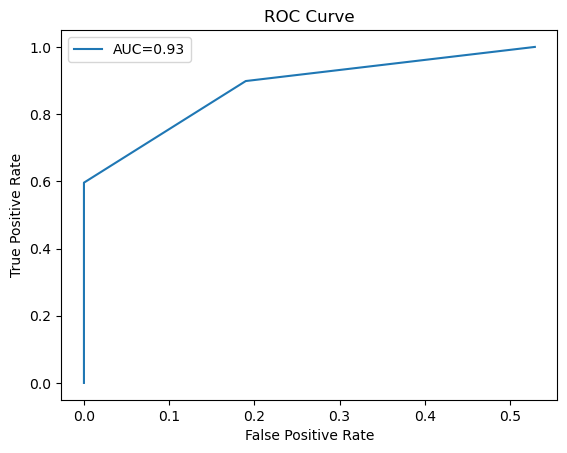

In [49]:
plt.plot(data_ROC['FPR'],data_ROC['TPR'],label=f'AUC={auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [50]:
# Compute best threshold
data_ROC['TPR-FPR']=data_ROC['TPR']-data_ROC['FPR']
max_TPR_FPR_diff= max(data_ROC['TPR-FPR'])
selected = data_ROC[data_ROC['TPR-FPR']==max_TPR_FPR_diff]['Threshold'].values[0]
selected

0.4

In [51]:
# Compute confusion matrix for the best threshold:
y_pred_train = (X_train_temp['prob']>selected).astype(int)
cm = confusion_matrix(y_train,y_pred_train)
cm

array([[320,  75],
       [ 46, 407]], dtype=int64)

In [52]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
TN = cm[1,0]
accuracy = (TP+TN)/(TP+TN+FP+FN)
misclassification=1-accuracy
sensitivity = TP/(TP+FN)
specificity = TN/(FP+TN)
precision = TP/(FP+TP)
f1_score = 2*precision*sensitivity/(sensitivity+precision)
print('Accuracy:', accuracy)
print('Misclassification', misclassification)
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)
print('Precision:', precision)
print('F1 Score:', f1_score)

Accuracy: 0.4617737003058104
Misclassification 0.5382262996941896
Sensitivity: 0.47325581395348837
Specificity: 0.38016528925619836
Precision: 0.8443983402489627
F1 Score: 0.6065573770491803


In [53]:
X_test_temp=X_test

In [54]:
X_test_temp['prob']=kmodel.predict_proba(X_test)[:,1]

In [55]:
data_ROC= pd.DataFrame(columns=['Threshold','TP','TN','FP','FN','TPR','FPR'])

In [56]:
#test set
j=0
for t in np.arange(0,1.1,0.1):
    y_test_pred=(X_test_temp['prob']>t).astype(int)
    cm = confusion_matrix(y_test, y_test_pred)
    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    TPR = TP/(TP+FN)
    FPR = FP/(TN+FP)
    data_ROC.loc[j]=pd.Series({'Threshold': t, 'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN, 'TPR': TPR, 'FPR': FPR})
    j=j+1
    
auc = roc_auc_score(y_test,X_test_temp['prob'])
print(data_ROC)
print(auc)

    Threshold     TP     TN    FP     FN    TPR       FPR
0         0.0  194.0   65.0  99.0    6.0  0.970  0.603659
1         0.1  194.0   65.0  99.0    6.0  0.970  0.603659
2         0.2  194.0   65.0  99.0    6.0  0.970  0.603659
3         0.3  194.0   65.0  99.0    6.0  0.970  0.603659
4         0.4  157.0  119.0  45.0   43.0  0.785  0.274390
5         0.5  157.0  119.0  45.0   43.0  0.785  0.274390
6         0.6  157.0  119.0  45.0   43.0  0.785  0.274390
7         0.7   93.0  151.0  13.0  107.0  0.465  0.079268
8         0.8   93.0  151.0  13.0  107.0  0.465  0.079268
9         0.9   93.0  151.0  13.0  107.0  0.465  0.079268
10        1.0    0.0  164.0   0.0  200.0  0.000  0.000000
0.8197103658536584


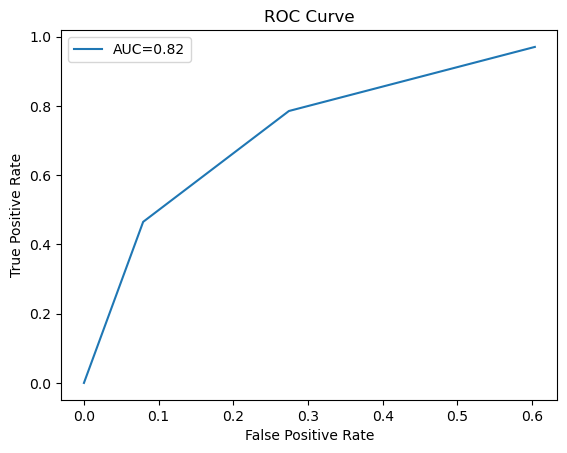

In [57]:
plt.plot(data_ROC['FPR'],data_ROC['TPR'],label=f'AUC={auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [58]:
# Compute best threshold
data_ROC['TPR-FPR']=data_ROC['TPR']-data_ROC['FPR']
max_TPR_FPR_diff= max(data_ROC['TPR-FPR'])
selected = data_ROC[data_ROC['TPR-FPR']==max_TPR_FPR_diff]['Threshold'].values[0]
selected

0.4

In [59]:
# Compute confusion matrix for the best threshold:
y_pred_test = (X_test_temp['prob']>selected).astype(int)
cm = confusion_matrix(y_test,y_pred_test)
cm

array([[119,  45],
       [ 43, 157]], dtype=int64)

In [60]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
TN = cm[1,0]
accuracy = (TP+TN)/(TP+TN+FP+FN)
misclassification=1-accuracy
sensitivity = TP/(TP+FN)
specificity = TN/(FP+TN)
precision = TP/(FP+TP)
f1_score = 2*precision*sensitivity/(sensitivity+precision)
print('Accuracy:', accuracy)
print('Misclassification', misclassification)
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)
print('Precision:', precision)
print('F1 Score:', f1_score)

Accuracy: 0.449438202247191
Misclassification 0.550561797752809
Sensitivity: 0.43977591036414565
Specificity: 0.48863636363636365
Precision: 0.7772277227722773
F1 Score: 0.5617173524150268


In [61]:
k_values = np.arange(3,10,2)
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    prob_train = model.predict_proba(X_train)[:, 1]
    auc_train = roc_auc_score(y_train, prob_train)
    print(f'train auroc k {k} : {auc_train}')
    prob_test = model.predict_proba(X_test)[:, 1]
    auc_test = roc_auc_score(y_test, prob_test)
    print(f'test AUROC k {k} : {auc_test}')

train auroc k 3 : 0.9370022633917344
test AUROC k 3 : 0.8148780487804879
train auroc k 5 : 0.8974851202950792
test AUROC k 5 : 0.8252743902439025
train auroc k 7 : 0.8837622600385615
test AUROC k 7 : 0.8286737804878048
train auroc k 9 : 0.8766088244334536
test AUROC k 9 : 0.830625


## Decision Tree Classifier

In [62]:
dtc = DecisionTreeClassifier()
model_dtc = dtc.fit(X_train,y_train)
y_pred_train_dtc = model_dtc.predict(X_train)
y_pred_test_dtc = model_dtc.predict(X_test)

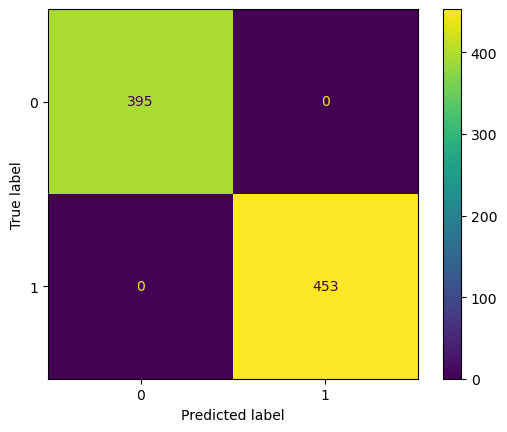

In [68]:
confusion_matrix_dtc_train = confusion_matrix(y_train,y_pred_train_dtc)
ConfusionMatrixDisplay(confusion_matrix_dtc_train).plot()
plt.show()

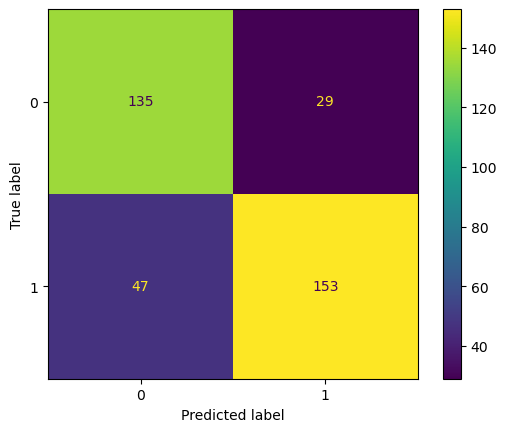

In [69]:
confusion_matrix_dtc_test = confusion_matrix(y_test,y_pred_test_dtc)
ConfusionMatrixDisplay(confusion_matrix_dtc_test).plot()
plt.show()

In [71]:
print('R2 score of the model in test',r2_score(y_pred_test_dtc,y_test))
print('Accuracy score of the model in test',accuracy_score(y_pred_test_dtc,y_test))
print('Recall score of the model in test',recall_score(y_pred_test_dtc,y_test))

R2 score of the model in test 0.1648351648351648
Accuracy score of the model in test 0.7912087912087912
Recall score of the model in test 0.8406593406593407


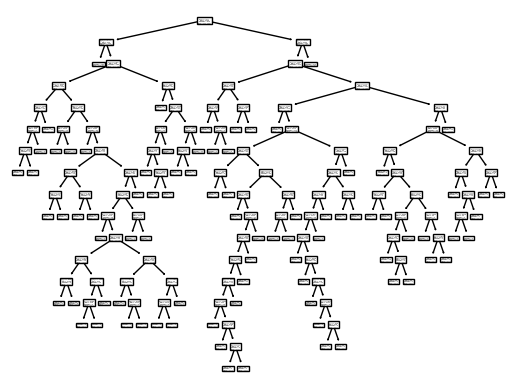

In [73]:
plot_tree(model_dtc)
plt.show()